In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from collections import defaultdict

In [13]:
folder = 'data/' 

# Sonuçları tutacağımız nested dictionary
results = defaultdict(lambda: {'full_sample': {}, 'on_folds': {}})

# Dosyaları dolaş
for filename in os.listdir(folder):
    if filename.endswith('.csv') and filename.startswith('results_MNAR'):
        parts = filename.replace('.csv', '').split('_')
        dgp = parts[2]  
        section = parts[3]  
        mode = parts[-1] 

        if section == 'full':
            sample_type = 'full_sample'
        elif section == 'on':
            sample_type = 'on_folds'
        else:
            continue 

        df = pd.read_csv(os.path.join(folder, filename))
        df = df[df['model'] != 'oracle'].reset_index(drop=True)
        results[dgp][sample_type][mode] = df

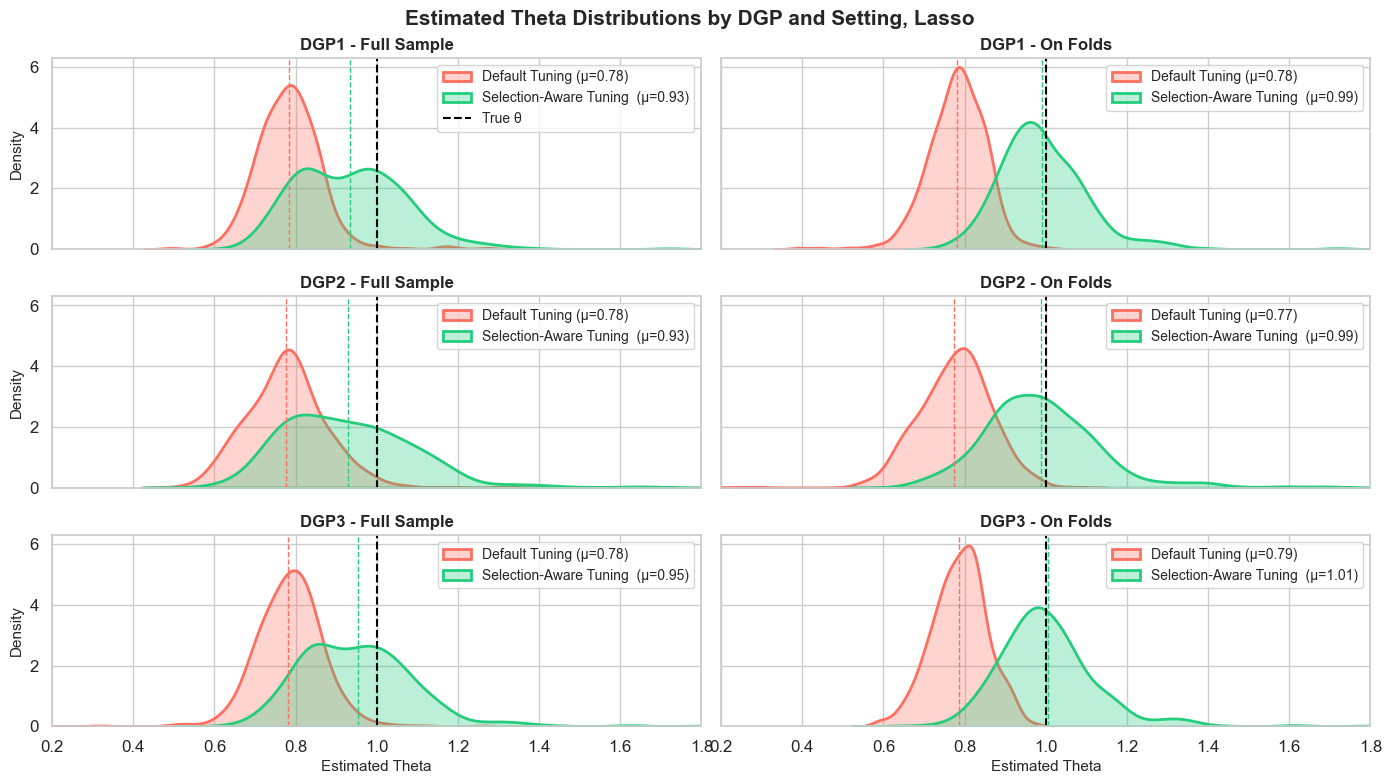

In [14]:
color_after = "#24CD7C"  # SlateBlue for Selection-Aware Tuning
color_before = '#FF6F61'   # Coral Red for Default Tuning

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

dgp_list = ['dgp1', 'dgp2', 'dgp3']
setting_list = ['full_sample', 'on_folds']

fig, axes = plt.subplots(3, 2, figsize=(14, 8), sharex=True, sharey=True)

for i, dgp in enumerate(dgp_list):
    for j, setting in enumerate(setting_list):
        ax = axes[i, j]
        try:
            df_before = results[dgp][setting]['before']
            df_after = results[dgp][setting]['after']

            mean_before = df_before['theta_hat'].mean()
            mean_after = df_after['theta_hat'].mean()

            sns.kdeplot(df_before['theta_hat'], label=f"Default Tuning (μ={mean_before:.2f})", color=color_before, fill=True, alpha=0.3, linewidth=2, ax=ax)
            sns.kdeplot(df_after['theta_hat'], label=f"Selection-Aware Tuning  (μ={mean_after:.2f})", color=color_after, fill=True, alpha=0.3, linewidth=2, ax=ax)

            ax.axvline(x=mean_before, color=color_before, linestyle='--', linewidth=1)
            ax.axvline(x=mean_after, color=color_after, linestyle='--', linewidth=1)
            
            true_theta_label = 'True θ' if i == 0 and j == 0 else None
            ax.axvline(x=1, color='black', linestyle='--', linewidth=1.5, label=true_theta_label)

            ax.set_title(f"{dgp.upper()} - {setting.replace('_', ' ').title()}", fontsize=12, weight='bold')
            if i == 2:
                ax.set_xlabel('Estimated Theta', fontsize=11)
            if j == 0:
                ax.set_ylabel('Density', fontsize=11)

            ax.legend(frameon=True, fontsize=10)

        except Exception as e:
            ax.set_title(f"{dgp.upper()} - {setting}: Error")
            ax.text(0.5, 0.5, str(e), ha='center', va='center')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.xlim(0.2,1.8)
fig.suptitle("Estimated Theta Distributions by DGP and Setting, Lasso", fontsize=15, weight='bold')
plt.show()


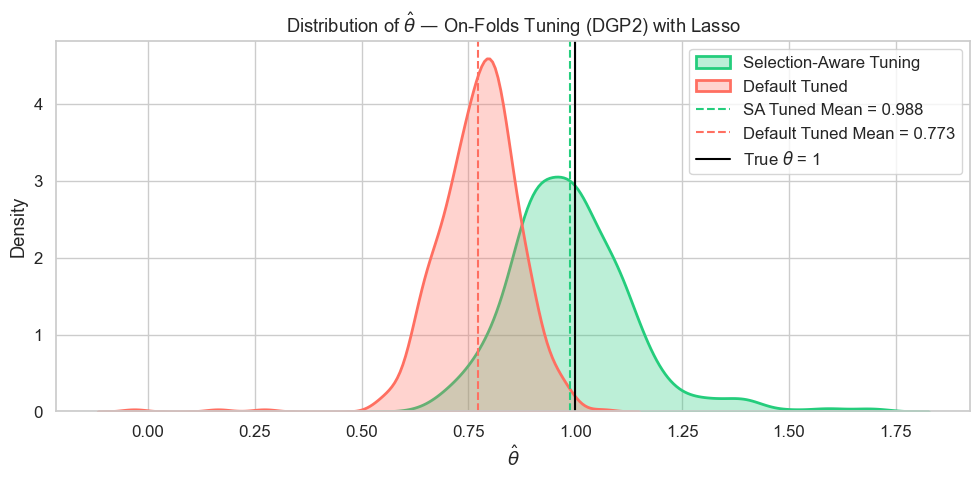

In [15]:
df_before = results['dgp2']['on_folds']['before']
df_after = results['dgp2']['on_folds']['after']

plt.figure(figsize=(10, 5))

sns.kdeplot(df_after['theta_hat'], label='Selection-Aware Tuning', color=color_after, fill=True, alpha=0.3, linewidth=2)

sns.kdeplot(df_before['theta_hat'], label='Default Tuned', color=color_before, fill=True, alpha=0.3, linewidth=2)

# Mean & Median
mean_after = df_after['theta_hat'].mean()
median_after = df_after['theta_hat'].median()
mean_before = df_before['theta_hat'].mean()
median_before = df_before['theta_hat'].median()

plt.axvline(mean_after, color=color_after, linestyle='--', label=f'SA Tuned Mean = {mean_after:.3f}')
plt.axvline(mean_before, color=color_before, linestyle='--', label=f'Default Tuned Mean = {mean_before:.3f}')
plt.axvline(1.0, color='black', linestyle='-', label='True $\\theta$ = 1')

plt.title('Distribution of $\\hat{\\theta}$ — On-Folds Tuning (DGP2) with Lasso ')
plt.xlabel('$\\hat{\\theta}$')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


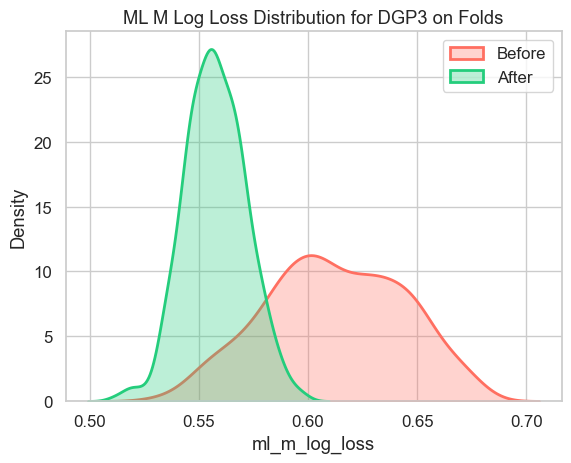

In [16]:
sns.kdeplot(results['dgp3']['on_folds']['before']['ml_m_log_loss'], label=f"Before", color=color_before, fill=True, alpha=0.3, linewidth=2)
sns.kdeplot(results['dgp3']['on_folds']['after']['ml_m_log_loss'], label=f"After", color=color_after, fill=True, alpha=0.3, linewidth=2)
plt.title("ML M Log Loss Distribution for DGP3 on Folds")
plt.legend()

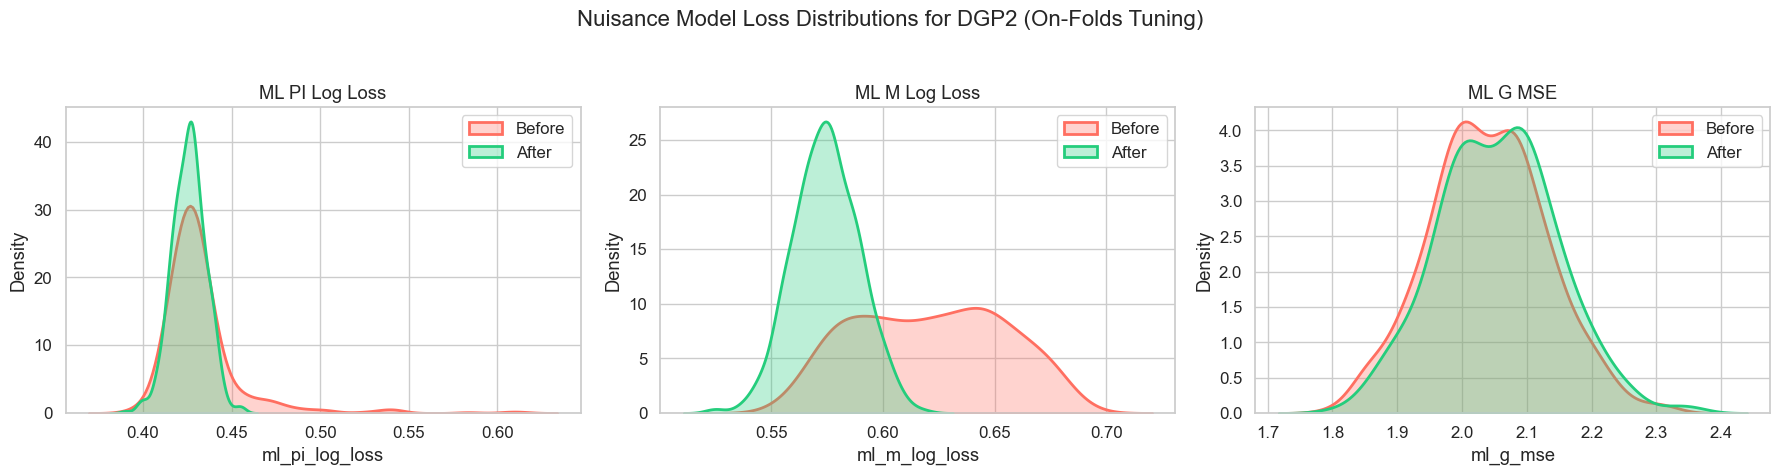

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
dgp = 'dgp2'

# PI log loss
sns.kdeplot(results[dgp]['on_folds']['before']['ml_pi_log_loss'], label="Before", color=color_before, fill=True, alpha=0.3, linewidth=2, ax=axes[0])
sns.kdeplot(results[dgp]['on_folds']['after']['ml_pi_log_loss'], label="After", color=color_after, fill=True, alpha=0.3, linewidth=2, ax=axes[0])
axes[0].set_title("ML PI Log Loss")
axes[0].legend()

# M log loss
sns.kdeplot(results[dgp]['on_folds']['before']['ml_m_log_loss'], label="Before", color=color_before, fill=True, alpha=0.3, linewidth=2, ax=axes[1])
sns.kdeplot(results[dgp]['on_folds']['after']['ml_m_log_loss'], label="After", color=color_after, fill=True, alpha=0.3, linewidth=2, ax=axes[1])
axes[1].set_title("ML M Log Loss")
axes[1].legend()

# G MSE
sns.kdeplot(results[dgp]['on_folds']['before']['ml_g_mse'], label="Before", color=color_before, fill=True, alpha=0.3, linewidth=2, ax=axes[2])
sns.kdeplot(results[dgp]['on_folds']['after']['ml_g_mse'], label="After", color=color_after, fill=True, alpha=0.3, linewidth=2, ax=axes[2])
axes[2].set_title("ML G MSE")
axes[2].legend()

plt.suptitle("Nuisance Model Loss Distributions for DGP2 (On-Folds Tuning)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


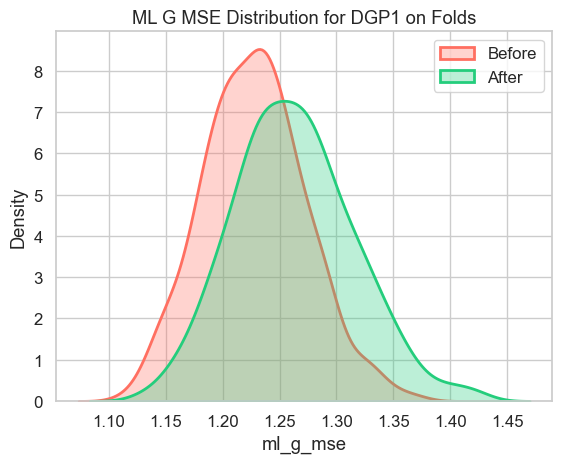

In [18]:
sns.kdeplot(results['dgp1']['on_folds']['before']['ml_g_mse'], label=f"Before", color=color_before, fill=True, alpha=0.3, linewidth=2)
sns.kdeplot(results['dgp1']['on_folds']['after']['ml_g_mse'], label=f"After", color=color_after, fill=True, alpha=0.3, linewidth=2)
plt.title("ML G MSE Distribution for DGP1 on Folds")
plt.legend()